## INSTANCE

In [4]:
cost_matrix = []

file = open('TSP.txt')
lines = file.readlines()
file.close()

for i in range(len(lines)):
    aux = lines[i][:-1].split('\t')
    aux = [int(i) for i in aux if i!= '']
    cost_matrix.append(aux)

n = len(cost_matrix)

In [5]:
cost_matrix

[[9999, 3, 5, 48, 48, 8, 8, 5, 5, 3, 3, 0, 3, 5, 8, 8, 5],
 [3, 9999, 3, 48, 48, 8, 8, 5, 5, 0, 0, 3, 0, 3, 8, 8, 5],
 [5, 3, 9999, 72, 72, 48, 48, 24, 24, 3, 3, 5, 3, 0, 48, 48, 24],
 [48, 48, 74, 9999, 0, 6, 6, 12, 12, 48, 48, 48, 48, 74, 6, 6, 12],
 [48, 48, 74, 0, 9999, 6, 6, 12, 12, 48, 48, 48, 48, 74, 6, 6, 12],
 [8, 8, 50, 6, 6, 9999, 0, 8, 8, 8, 8, 8, 8, 50, 0, 0, 8],
 [8, 8, 50, 6, 6, 0, 9999, 8, 8, 8, 8, 8, 8, 50, 0, 0, 8],
 [5, 5, 26, 12, 12, 8, 8, 9999, 0, 5, 5, 5, 5, 26, 8, 8, 0],
 [5, 5, 26, 12, 12, 8, 8, 0, 9999, 5, 5, 5, 5, 26, 8, 8, 0],
 [3, 0, 3, 48, 48, 8, 8, 5, 5, 9999, 0, 3, 0, 3, 8, 8, 5],
 [3, 0, 3, 48, 48, 8, 8, 5, 5, 0, 9999, 3, 0, 3, 8, 8, 5],
 [0, 3, 5, 48, 48, 8, 8, 5, 5, 3, 3, 9999, 3, 5, 8, 8, 5],
 [3, 0, 3, 48, 48, 8, 8, 5, 5, 0, 0, 3, 9999, 3, 8, 8, 5],
 [5, 3, 0, 72, 72, 48, 48, 24, 24, 3, 3, 5, 3, 9999, 48, 48, 24],
 [8, 8, 50, 6, 6, 0, 0, 8, 8, 8, 8, 8, 8, 50, 9999, 0, 8],
 [8, 8, 50, 6, 6, 0, 0, 8, 8, 8, 8, 8, 8, 50, 0, 9999, 8],
 [5, 5, 26, 12, 12, 

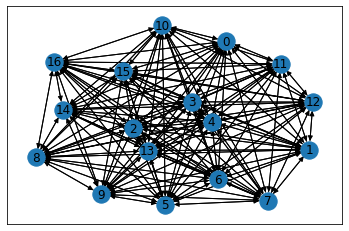

In [6]:
# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
 
g = nx.DiGraph(directed=True)

for i in range(n):
    for j in range(n):
        if i != j:
            g.add_weighted_edges_from([(i, j,cost_matrix[i][j])])
# g.add_weighted_edges_from([(2, 3,1)])
# g.add_weighted_edges_from([(3, 4,1)])
# g.add_weighted_edges_from([(1, 4,1)])
# g.add_weighted_edges_from([(1, 2,10)])
 
nx.draw_networkx(g, with_labels = True)
plt.draw()
plt.show()

## MODEL INITIALIZATION AND ITS PARAMETERS

In [8]:
import pyomo.environ as pyEnv

#Model
model = pyEnv.ConcreteModel()

#Indexes for the cities
model.M = pyEnv.RangeSet(n)                
model.N = pyEnv.RangeSet(n)

#Index for the dummy variable u
model.U = pyEnv.RangeSet(2,n)

#Decision variables xij
model.x=pyEnv.Var(model.N,model.M, within=pyEnv.Binary)

#Dummy variable ui
model.u=pyEnv.Var(model.N, within=pyEnv.NonNegativeIntegers,bounds=(0,n-1))

#Cost Matrix cij
model.c = pyEnv.Param(model.N, model.M,initialize=lambda model, i, j: cost_matrix[i-1][j-1])

## OBJECTIVE FUNCTION AND CONSTRAINTS

In [9]:
def obj_func(model):
    return sum(model.x[i,j] * model.c[i,j] for i in model.N for j in model.M)

model.objective = pyEnv.Objective(rule=obj_func,sense=pyEnv.minimize)

##------------------------------------------------------##
#Only 1 leaves each city

def rule_const1(model,M):
    return sum(model.x[i,M] for i in model.N if i!=M ) == 1

model.const1 = pyEnv.Constraint(model.M,rule=rule_const1)
##------------------------------------------------------##
#Only 1 enters each city

def rule_const2(model,N):
    return sum(model.x[N,j] for j in model.M if j!=N) == 1

model.rest2 = pyEnv.Constraint(model.N,rule=rule_const2)
##------------------------------------------------------##
#Only a single tour covering all cities

def rule_const3(model,i,j):
    if i!=j: 
        return model.u[i] - model.u[j] + model.x[i,j] * n <= n-1
    else:
        #Yeah, this else doesn't say anything
        return model.u[i] - model.u[i] == 0 
    
model.rest3 = pyEnv.Constraint(model.U,model.N,rule=rule_const3)

## MODEL SOLVING

In [10]:
#Prints the entire model
model.pprint()

#Solves
solver = pyEnv.SolverFactory('cplex')
result = solver.solve(model,tee = False)

#Prints the results
print(result)

3 Set Declarations
    c_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    N*M :  289 : {(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (

## DECISION VARIABLES

In [11]:
##(city i,city j)

List = list(model.x.keys())
for i in List:
    if model.x[i]() != 0:
        print(i,'--', model.x[i]())

(1, 14) -- 1.0
(2, 11) -- 1.0
(3, 2) -- 1.0
(4, 5) -- 1.0
(5, 9) -- 1.0
(6, 7) -- 1.0
(7, 15) -- 1.0
(8, 17) -- 1.0
(9, 8) -- 1.0
(10, 6) -- 1.0
(11, 13) -- 1.0
(12, 1) -- 1.0
(13, 10) -- 1.0
(14, 3) -- 1.0
(15, 16) -- 1.0
(16, 4) -- 1.0
(17, 12) -- 1.0


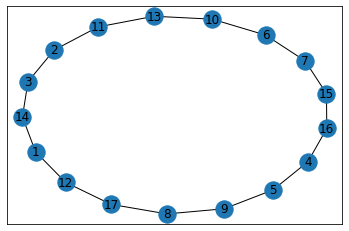

In [14]:
# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
 
G = nx.Graph()

for i in List:
    if model.x[i]() != 0:
        # print(i)
        G.add_edges_from([i])

nx.draw_networkx(G, with_labels = True)
plt.draw()
plt.show()